# Application Review <title>TITLE GOES HERE</title>

### <hp>HP @ <rpm>

### Path to TDMS file:

In [2]:
tdmspath = "c:/appReview/Rears_CAC.tdms"

### Constants from Performance Curve

In [3]:
import TDMS_Template as tt

defaults = tt.TestingDefaults()
perf_curve_cac_min = 48  #degrees C
perf_curve_cac_max = 56  #degrees C
perf_curve_max_top_tank = 113 #degrees C

perf_curve_min_water_pump_inlet_95C = 110 #kPa
perf_curve_max_intake_restriction = -3.75 #kPa

### Setup Data Structures and Perform Standard calculations

In [2]:
from ipywidgets import widgets
from IPython.display import display
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

In [32]:
#Add calculated columns to the base data frame
#df = pd.DataFrame(mL, index=mL['Timestamp'])

#Standard Calculations
#ambient sensor was being heated - to warmer than air at front of radiator and air intake
df['Ambient'] = ((df.tT01_Ambient_Air_01 + df.tT02_Ambient_Air_02) / 2.0) -6
df['CorrectedCAC'] = 25 - df.Ambient + df.cCACOutTemp
df['LAT'] = perf_curve_max_top_tank - df.cCoolantTemp + df.Ambient
df['IntakeTempRise'] = df.tT03_Air_Cleaner_Inlet - df.Ambient
df['IntakeRestrictionAvailable'] = df.pP01_Intake_Air_Restriction - perf_curve_max_intake_restriction

### Plot overall Run.  Look at index at bottom for more detailed plot in next cell.

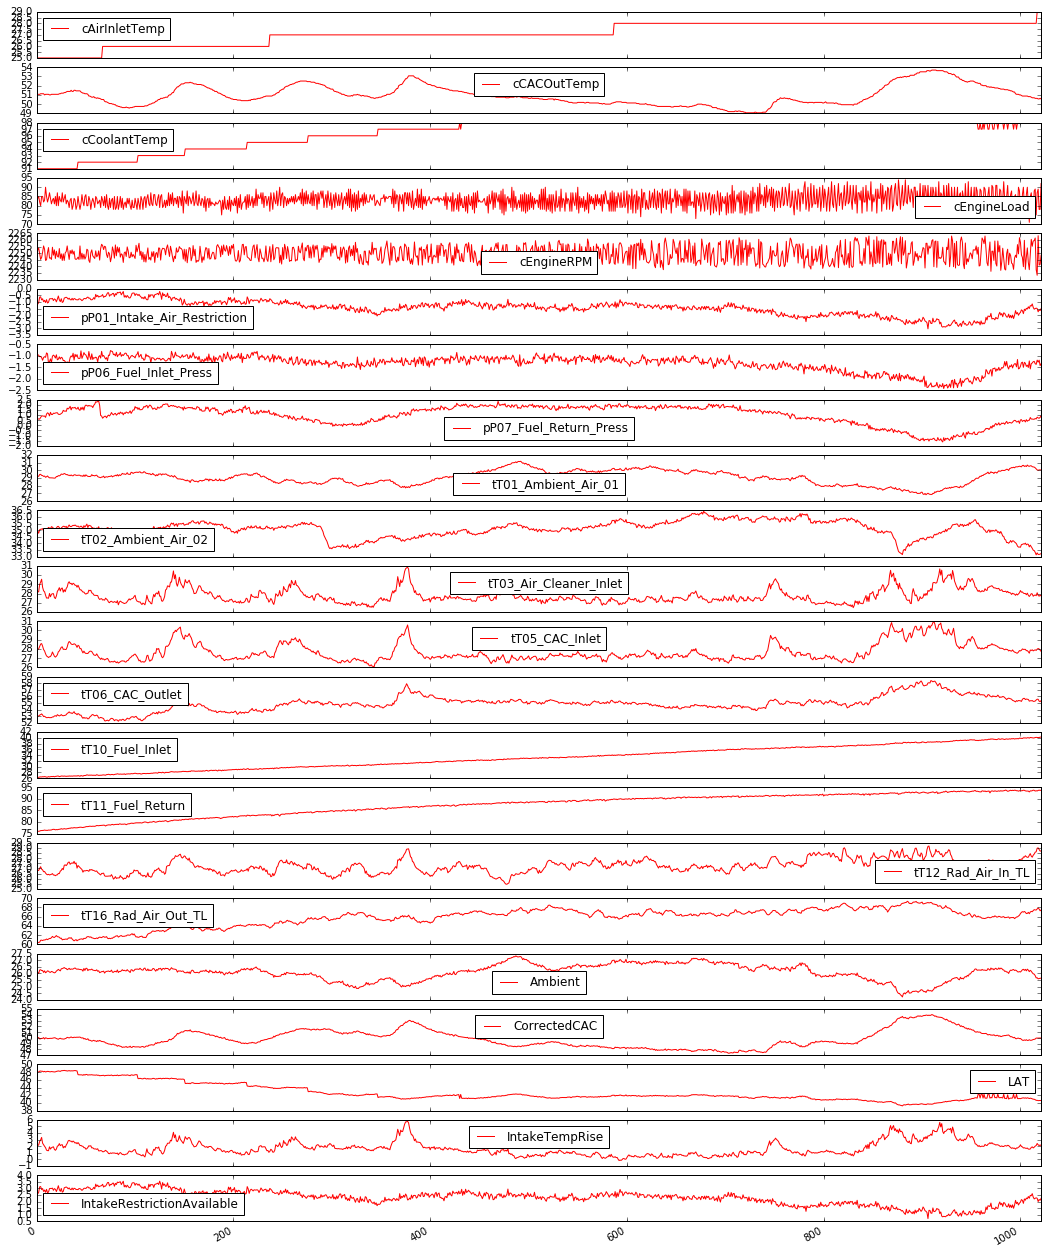

In [33]:
df.plot(figsize=(18,24), color=('r'), subplots=True );

### Place the start and end timestamp of the test to be analyzed below

Not all data in the data frame should go into the CAC and temp rise histograms.  Specify only the data where the engine has been warmed up and is running under a representative load for this subset of the data.  Full test runs can be obtained by referening the df data frame instead of this test_subset data frame

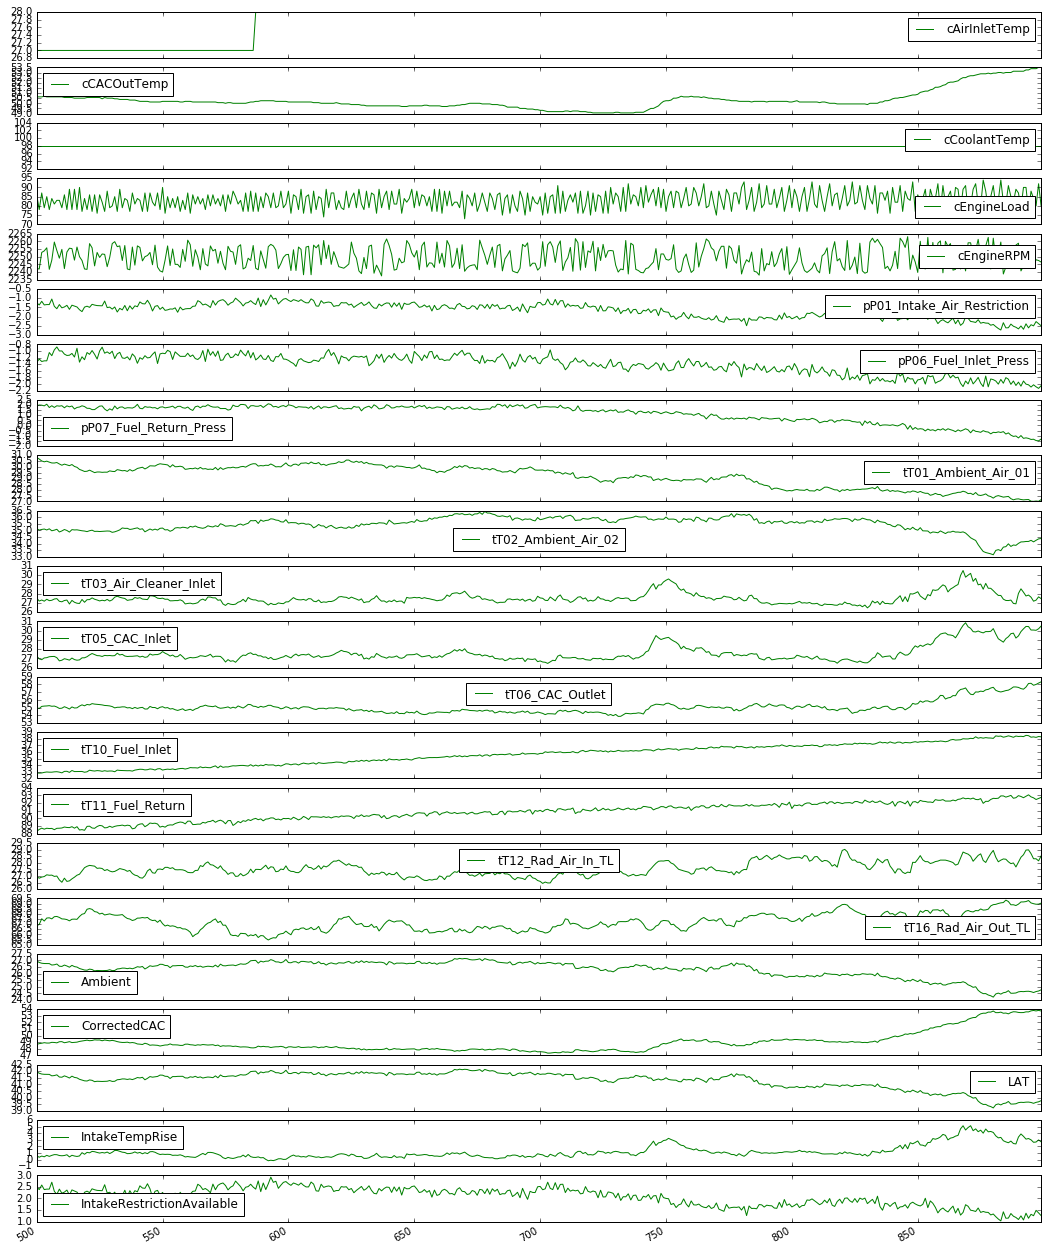

In [34]:
test_subset = df[500:900]
section_plot = test_subset.plot(figsize=(18,24), color = ('g'), subplots=True);

# Histograms from the test_subset data

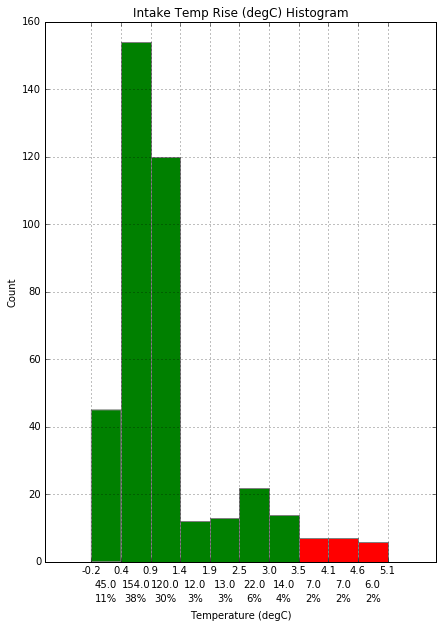

In [35]:
wpphist.plot(data=test_subset['IntakeTempRise'].values, ylabel='Count', xlabel='Temperature (degC)', 
             title='Intake Temp Rise (degC) Histogram', color='green');

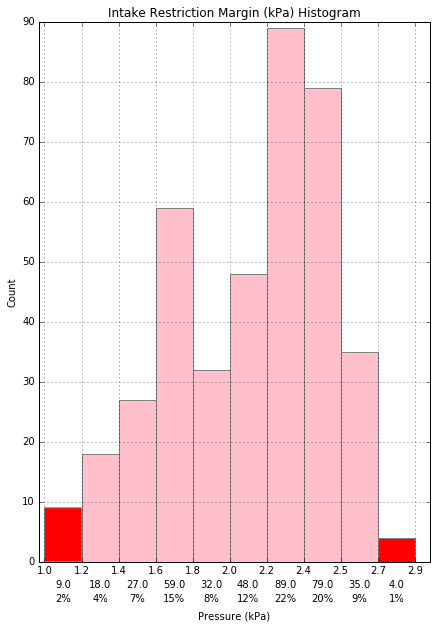

In [36]:
wpphist.plot(data=test_subset['IntakeRestrictionAvailable'].values, ylabel='Count', xlabel='Pressure (kPa)', 
             title='Intake Restriction Margin (kPa) Histogram', color='pink');

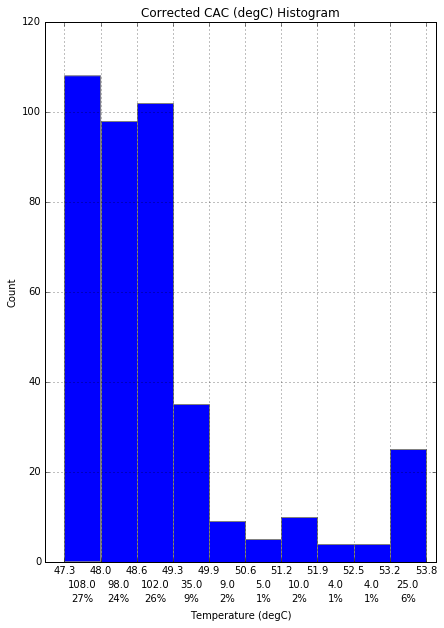

In [37]:
wpphist.plot(data=test_subset['CorrectedCAC'].values, ylabel='Count', xlabel='Temperature (degC)', 
             title='Corrected CAC (degC) Histogram', color='blue');

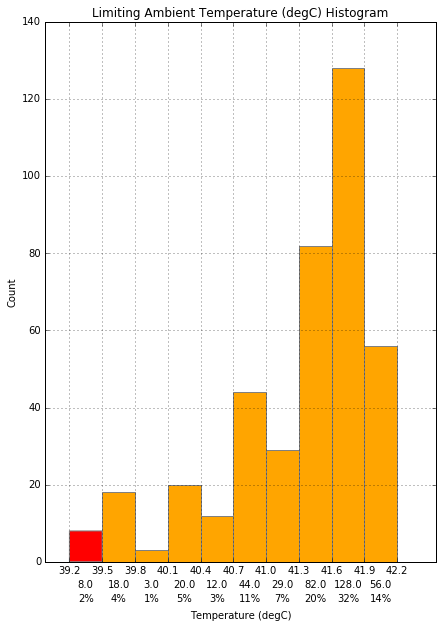

In [38]:
wpphist.plot(data=test_subset['LAT'].values, ylabel='Count', xlabel='Temperature (degC)', 
             title='Limiting Ambient Temperature (degC) Histogram', color='orange');

In [39]:
#water_pump_df = test_subset[['pP04_Water_Pump_Inlet', 'cCoolantTemp']]
#wp_df = (water_pump_df[water_pump_df['cCoolantTemp'] > 82]) #filter out low coolant temp values

#wpphist.plot(data=wp_df['pP04_Water_Pump_Inlet'].values, ylabel='Count', xlabel='Pressure (kPa)', 
#             title='Water Pump Inlet Pressure (kPa) Histogram', color='yellow')
